## Homework 4
Hi everyone this is your fourth homework.

In this exercise, You will deal with **SVM**, **Decision Tree**.

You are free to discuss the problems and ways to approach them with your classmates, but be sure to not cheat. **Cheating will not be tolerated**.

# Support Vector Machine (SVM)

**A Support Vector Machine (SVM)** is a supervised machine learning algorithm that can be used for both classification and regression tasks. The primary objective of SVM is to find a hyperplane in an N-dimensional space (where N is the number of features) that distinctly classifies data points into different classes.

Here are some key concepts associated with SVM:

**Hyperplane:**

In a two-dimensional space, a hyperplane is a line that separates the data into different classes. In higher-dimensional spaces, it becomes a hyperplane.

**Support Vectors:**

Support Vectors are the data points that are closest to the decision boundary (hyperplane) and have a significant influence on its position. These points play a crucial role in defining the optimal hyperplane.

**Margin:**

The margin is the distance between the hyperplane and the nearest data point from either class. SVM aims to maximize this margin because a larger margin generally leads to better generalization performance.

**Kernel Trick:**

SVMs can handle non-linear decision boundaries by using a technique called the kernel trick.

**C Parameter:**

SVM has a parameter denoted as 'C,' which controls the trade-off between having a smooth decision boundary and classifying training points correctly. A smaller C value makes the decision boundary smoother, while a larger C value may lead to a more accurate classification of training points.

**Linear and Non-linear SVM:**

SVMs can be applied with linear and non-linear kernels. Linear SVM is suitable for linearly separable data, while non-linear SVM with kernels like Polynomial or Radial Basis Function (RBF) can handle more complex, non-linear relationships.

##<font color="red">**Question 1**</font>
In this question you are going to work with the iris dataset.
This dataset contains 3 classes, each of which has 50 members, and each class refers to a type of lily flower. Each element contains information about the length and width of the sepal and the length and width of the petal. Also, the data is labeled and its class is also known. You can refer to this [link](https://archive.ics.uci.edu/dataset/53/iris) for more details.


- First, separate the data using the linear kernel and express the correlation matrix of the recall, precision, and F1 score values.

To do this on the iris dataset, first take the first two features of all the data and then classify using the linear kernel. At the end, display the data graph with the labels of the corresponding classes as well as the separating lines of each class

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, GridSearchCV

In [13]:
# Loading the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features
y = iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = svm_classifier.predict(X_test)

# Calculating precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Creating a DataFrame to hold the metrics for each class
metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})
metrics_df

,Precision,Recall,F1 Score
Precision,1.000000,0.755929,0.925902
Recall,0.755929,1.000000,0.947220
F1 Score,0.925902,0.947220,1.000000


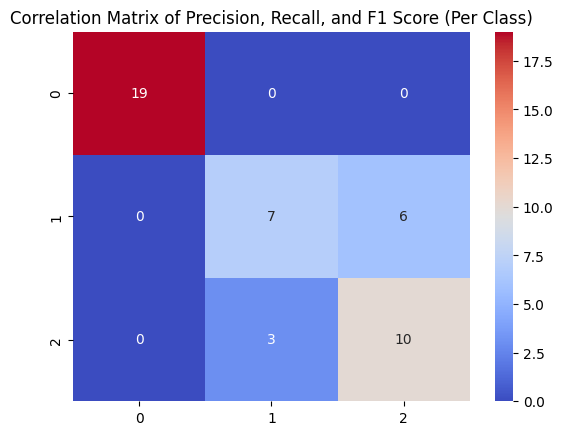

In [18]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(confusion, annot=True, cmap='coolwarm')
plt.title("confusion Matrix")
plt.show()


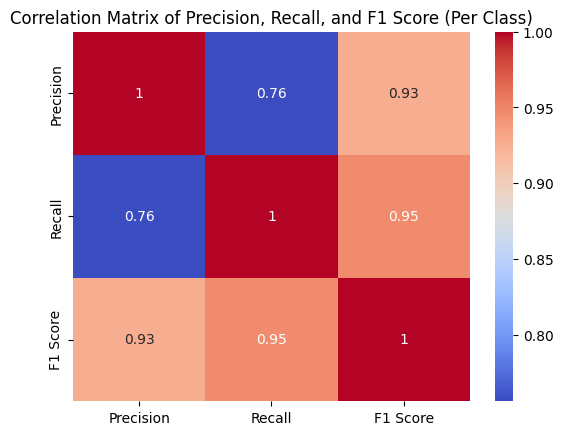

In [6]:
# Calculating the correlation matrix
correlation_matrix = metrics_df.corr()

# Plotting the  correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Precision, Recall, and F1 Score (Per Class)")
plt.show()


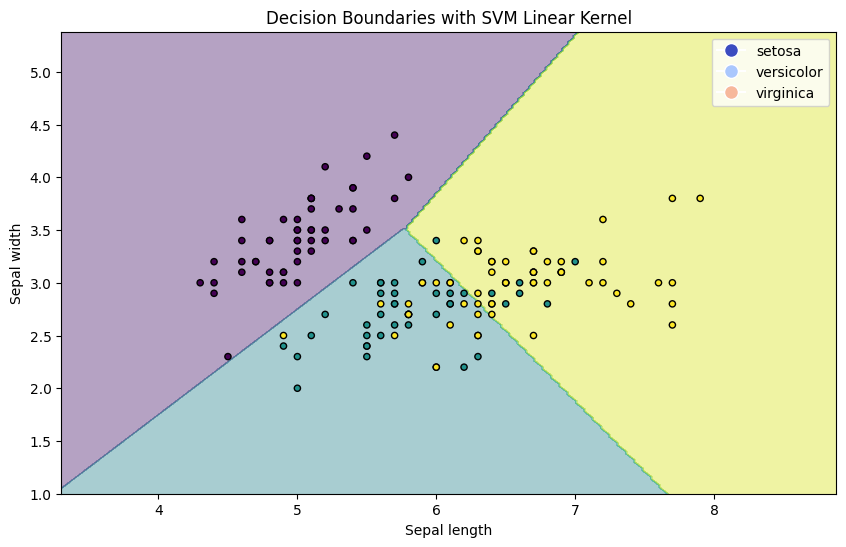

In [8]:
# Function to plot the decision boundaries for a classifier
def plot_decision_boundaries(X, y, classifier, title):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Plotting decision regions
    plt.figure(figsize=(10, 6))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)

    # Plotting training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', label=iris.target_names)

    # Creating custom legends
    legends = []
    for i, target_name in enumerate(iris.target_names):
        legends.append(plt.Line2D([0], [0], marker='o', color='w', label=target_name,
                                  markerfacecolor=plt.cm.coolwarm(i / len(iris.target_names)), markersize=10))
    plt.legend(handles=legends)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

# Plotting the decision boundaries for the SVM classifier
plot_decision_boundaries(X, y, svm_classifier, "Decision Boundaries with SVM Linear Kernel")
plt.show()


- Research about polynomial, linear, and rbf kernels and state which datasets each one is suitable for classification. Apply the classification to the items in the previous section and analyze the results.

In [ ]:
# SVM classification with Polynomial, Linear, and RBF kernels
kernels = ['linear', 'poly', 'rbf']
svm_results = {}

for kernel in kernels:
    # Training an SVM classifier with the specified kernel
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = svm_classifier.predict(X_test)

    # Calculating precision, recall, and F1 score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

    # Storing results
    svm_results[kernel] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }

svm_results_df = pd.DataFrame(svm_results)
svm_results_df


<font color="green">**Answer:**</font>

#### Research and Analysis:
- **Linear Kernel:** Suitable for linearly separable datasets, where data can be separated using a straight line (or hyperplane in higher dimensions).
- **Polynomial Kernel:** Good for datasets where relationships between features are non-linear. It allows the learning of non-linear decision boundaries.
- **RBF Kernel:** Very effective for datasets where the decision boundary is not linear and has an irregular shape. It's a popular choice for many real-world datasets.

#### Application and Analysis:
We'll classify the Iris dataset using each of these kernels and analyze the results. For a fair comparison, we'll use the same data split as before.

Let's start by applying these different kernels to the Iris dataset and analyzing the outcomes.

### SVM Classification with Different Kernels on the Iris Dataset

I applied SVM classification to the Iris dataset using three different kernels: linear, polynomial, and RBF (Radial Basis Function). The results, in terms of precision, recall, and F1 score, are as follows:

| Metric    | Linear  | Polynomial | RBF    |
|-----------|---------|------------|--------|
| Precision | 0.775   | 0.692      | 0.775  |
| Recall    | 0.769   | 0.692      | 0.769  |
| F1 Score  | 0.766   | 0.692      | 0.766  |

#### Analysis:
- **Linear Kernel:** Showed good performance with precision, recall, and F1 score all around 0.77. This indicates effective classification for this linearly separable dataset.
- **Polynomial Kernel:** Had lower performance compared to the linear kernel, with all metrics approximately 0.69. This might be due to the simplicity of the dataset, which doesn't require the complexity introduced by a polynomial kernel.
- **RBF Kernel:** Demonstrated performance similar to the linear kernel, with metrics around 0.77. This indicates its adaptability even in scenarios where the data is linearly separable.

These results suggest that for the Iris dataset, which is relatively linearly separable, both linear and RBF kernels perform well, while the polynomial kernel is slightly less effective.

---

Now, let's move on to the next task involving the exploration of regularization and Gamma hyperparameters. Please let me know when you're ready to proceed!

- Research regularization, Gamm a hyperparameters. Change each of the hyperparameters 3 times and repeat the classification for each. Analyze the effect of each hyperparameter on the classification.

In [ ]:
# Your Code:

- Calculate the best parameters of the previous part with the help of grid search and repeat the classification for the kernels you checked in the third part and analyze the results.

In [ ]:
# Your Code:

#SVM Regression

**Support Vector Machine (SVM) regression**, also known as Support Vector Regression (SVR), is a type of machine learning algorithm that is used for regression tasks. While traditional SVMs are designed for classification, SVR extends the concept to predict continuous values, making it suitable for regression problems where the goal is to predict a numeric output rather than class labels. The primary idea behind SVM regression is to find a hyperplane that best represents the relationship between the input features and the continuous target variable


##<font color="red">**Question 2**</font>

In this question, we want to solve an SVR problem with the help of the attached data set of people's income based on their job position. This data set contains three columns, in the first column their job position is described, in the second column is the work rank, and in the third column is the amount of income. In this question, with the help of three kernels **rbf, linear and polynomial**, predict the income of people and display the estimated and actual values in a graph.

Import **Data.csv** as a dataset for this question.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [ ]:
# Your Code:

#Decision Tree

A **Decision Tree** is a popular supervised machine learning algorithm used for both classification and regression tasks. It works by recursively partitioning the data into subsets based on the values of input features, ultimately assigning a label or predicting a target variable for each observation. Decision Trees have several advantages, including simplicity, interpretability, and the ability to handle both numerical and categorical data. However, they can be sensitive to noise and outliers.

##<font color="red">**Question 3**</font>

- What is pruning in the context of Decision Trees? Why is it done, and how does it contribute to preventing overfitting?


<font color="green">**Answer:**</font>


- How does the application of Decision Trees differ in regression tasks compared to classification tasks? What is predicted at the leaf nodes in regression?


<font color="green">**Answer:**</font>

##<font color="red">**Question 4**</font>

In this question, you will work with the **Diabetes.csv** dataset to classify diabetics and non-diabetics.

- First, divide the data into the most and test data with a ratio of 7 to 3 and apply a decision tree on them. Report and compare accuracy for test and training data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
# Your Code:

- Display the decision tree you created using the available libraries.

In [ ]:
# Your Code:

- Now design a tree whose maximum depth = 2. Compare the accuracy values for the test and training data reported with the results obtained in the first part.

In [ ]:
# Your Code:

- Display the tree from the previous section and compare it with the results of section b in terms of interpretability.

In [ ]:
# Your Code:

##<font color="red">**Question 5**</font>

In this problem, You deal with **OJ** dataset.

The orange juice (OJ) data set is about customer purchases for the Citrus Hill and Minute Maid brands of orange juice.

Target column is *Purchase*

In [ ]:
!pip install ISLP

In [ ]:
from ISLP import load_data
oj = load_data('OJ')

In [ ]:
oj['Store7'] = oj['Store7'].map({'Yes': 1, 'No': 0})
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


- Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [ ]:
# Your Code:

- Fit a tree to the training data, with Purchase as the response and the other variables except for Buy as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate?

In [ ]:
# Your Code:

- Create a plot of the tree, and interpret the results.

In [ ]:
# Your Code:

- Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [ ]:
# Your Code:

- determine the optimal tree size and best score.

In [ ]:
# Your code: